---


<img width=25% src="https://raw.githubusercontent.com/gabrielcapela/credit_risk/main/images/myself.png" align=right>

# **Credit Risk Assessment Project**

*by Gabriel Capela*

[<img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>](https://www.linkedin.com/in/gabrielcapela)
[<img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white" />](https://medium.com/@gabrielcapela)

---

This project aims to develop a **Machine Learning model capable of predicting the probability of customer default** at the time of a credit card application, even before any payment history is available.

Default prediction is critical to minimize financial losses, preserve institutional credibility, and provide fair and efficient access to credit. However, the task is challenging due to limited data at the application stage, potential classification errors (false positives/negatives), and the need for representative historical data.

The ultimate goal is to provide financial institutions with a **data-driven decision-support tool** that improves the accuracy and fairness of credit approval processes.



<p align="center">
<img width=90% src="https://raw.githubusercontent.com/gabrielcapela/credit_risk/main/images/crisp-dm.jpeg">
</p>



This notebook will cover the **last three phases** of the project: Modeling, Evaluation and Deployment.

#  Modeling

This step will follow the following sequence: First, we will **create a pipeline** for training multiple models, after which **two models will be chosen** to move forward. These two models will be **hyperparameterized** and, finally, they will perharps be combined into a **ensemble model**.

In [98]:
import warnings
import pandas as pd
import numpy as np

# Ignore all types of warnings
warnings.filterwarnings("ignore")

X_train= pd.read_csv("../data/X_train.csv")
X_test= pd.read_csv("../data/X_test.csv")
y_train= pd.read_csv("../data/y_train.csv")
y_test= pd.read_csv("../data/y_test.csv")

print(f'The X_train shape is {X_train.shape[0]} x {X_train.shape[1]}')
print(f'The X_test shape is {X_test.shape[0]} x {X_test.shape[1]}')
print(f'The y_train shape is {y_train.shape[0]} x {y_train.shape[1]}')
print(f'The y_test shape is {y_test.shape[0]} x {y_test.shape[1]}')


The X_train shape is 26837 x 43
The X_test shape is 11502 x 43
The y_train shape is 26837 x 1
The y_test shape is 11502 x 1


In [99]:
pd.set_option('display.max_columns', None) 
X_train.head()

,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,facebook_profile_False,facebook_profile_True,facebook_profile_not provided,real_state_+qWF9pJpVGtTFn4vFjb/cg==,real_state_N5/CE7lSkAfB04hVFFwllw==,real_state_UX7AdFYgQh+VrVC5eIaU9w==,real_state_n+xK9CfX0bCn77lClTWviw==,real_state_nSpvDsIsslUaX6GE6m6eQA==,target_fraud_fraud_friends_family,target_fraud_fraud_id,target_fraud_without fraud,application_time_category_00-06,application_time_category_06-12,application_time_category_12-18,application_time_category_18-00
0,0.257908,340.0,99.152286,0.847020,92.870042,0.26,0.00,0.0,20184.0,40019.80,38.0,0.0,0.0,4.0,4.0,19,2,0.0,40.0,544,76109.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,0.158149,340.0,101.423644,0.210806,99.129450,0.20,0.00,0.0,0.0,48317.98,44.0,0.0,0.0,7.0,7.0,342,2,0.0,26.0,253,140446.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0.098999,570.0,95.921783,0.832893,98.034083,0.23,0.00,0.0,35608.0,60030.76,0.0,0.0,0.0,9.0,9.0,151,1,0.0,3.0,414,97117.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
3,0.033755,390.0,98.590815,0.587373,96.835089,0.11,15012.31,36.0,27642.0,46531.29,0.0,0.0,0.0,12.0,12.0,202,3,1.0,50.0,230,51217.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,0.111632,420.0,97.737889,0.705368,102.029359,0.40,0.00,0.0,0.0,57747.06,0.0,0.0,0.0,7.0,0.0,477,1,0.0,15.0,58,104002.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


## Baseline

A baseline model provides a **simple performance reference** to evaluate more complex models. It helps identify if your advanced techniques are truly adding value. Without it, there's no clear benchmark for improvement.


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4524
           1       0.00      0.00      0.00       844

    accuracy                           0.84      5368
   macro avg       0.42      0.50      0.46      5368
weighted avg       0.71      0.84      0.77      5368



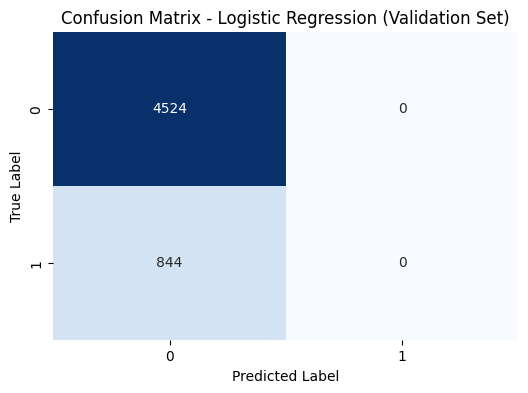

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, log_loss, confusion_matrix,
    classification_report, accuracy_score
)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Split the training data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split.values.ravel()) 

# Make predictions on validation set
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (Validation Set)")
plt.show()

Despite an accuracy of 0.84, the **F1-Score was zero** because the model is biased in favor of the majority class, as evidenced by the lack of predictions for the minority class. To improve performance, it is crucial to address class imbalance using techniques such as class weighting or resampling.

## Creating a Pipeline

A Pipeline is used to streamline the machine learning workflow by **chaining together preprocessing steps—such** as data scaling and sampling techniques—with model training. This structure helps avoid code repetition and makes it easier to test multiple models consistently. 


Model: Logistic Regression | Balancing: SMOTE
Accuracy: 0.6975
F1-Score (class 1): 0.3954

Classification Report:
              precision    recall  f1-score   support

           0     0.9112    0.7102    0.7983      4524
           1     0.2883    0.6291    0.3954       844

    accuracy                         0.6975      5368
   macro avg     0.5998    0.6697    0.5968      5368
weighted avg     0.8133    0.6975    0.7349      5368



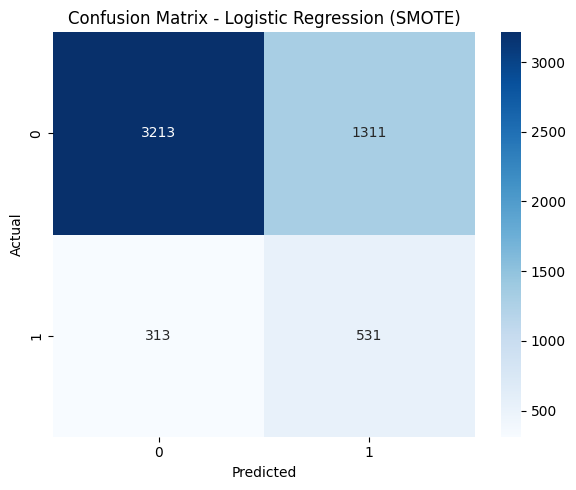


Model: Logistic Regression | Balancing: UnderSampling
Accuracy: 0.6984
F1-Score (class 1): 0.3966

Classification Report:
              precision    recall  f1-score   support

           0     0.9116    0.7111    0.7990      4524
           1     0.2893    0.6303    0.3966       844

    accuracy                         0.6984      5368
   macro avg     0.6004    0.6707    0.5978      5368
weighted avg     0.8137    0.6984    0.7357      5368



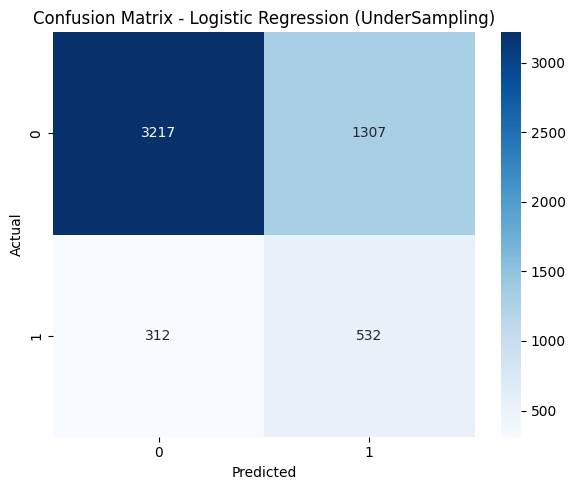


Model: Random Forest | Balancing: SMOTE
Accuracy: 0.8554
F1-Score (class 1): 0.2971

Classification Report:
              precision    recall  f1-score   support

           0     0.8669    0.9788    0.9194      4524
           1     0.6308    0.1943    0.2971       844

    accuracy                         0.8554      5368
   macro avg     0.7488    0.5865    0.6083      5368
weighted avg     0.8298    0.8554    0.8216      5368



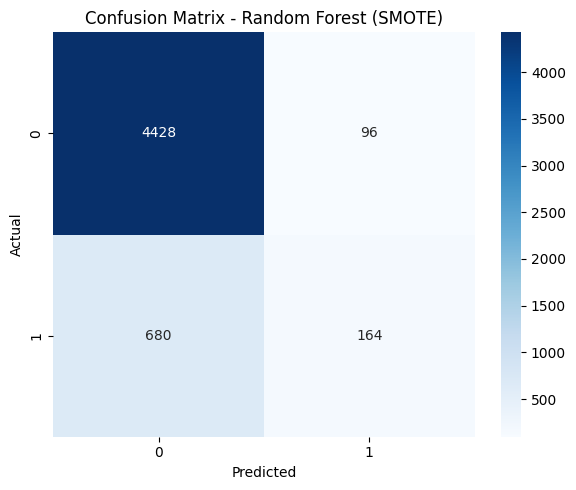


Model: Random Forest | Balancing: UnderSampling
Accuracy: 0.6900
F1-Score (class 1): 0.3949

Classification Report:
              precision    recall  f1-score   support

           0     0.9131    0.6987    0.7916      4524
           1     0.2849    0.6434    0.3949       844

    accuracy                         0.6900      5368
   macro avg     0.5990    0.6710    0.5933      5368
weighted avg     0.8143    0.6900    0.7293      5368



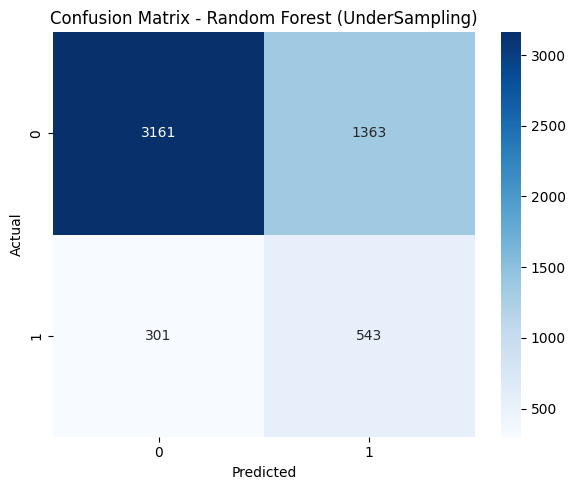


Model: K-Nearest Neighbors | Balancing: SMOTE
Accuracy: 0.5626
F1-Score (class 1): 0.2802

Classification Report:
              precision    recall  f1-score   support

           0     0.8688    0.5665    0.6858      4524
           1     0.1890    0.5415    0.2802       844

    accuracy                         0.5626      5368
   macro avg     0.5289    0.5540    0.4830      5368
weighted avg     0.7619    0.5626    0.6221      5368



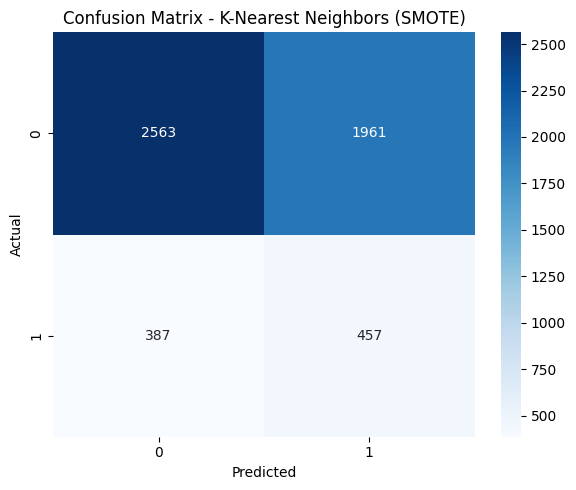


Model: K-Nearest Neighbors | Balancing: UnderSampling
Accuracy: 0.6112
F1-Score (class 1): 0.3018

Classification Report:
              precision    recall  f1-score   support

           0     0.8781    0.6256    0.7306      4524
           1     0.2103    0.5344    0.3018       844

    accuracy                         0.6112      5368
   macro avg     0.5442    0.5800    0.5162      5368
weighted avg     0.7731    0.6112    0.6632      5368



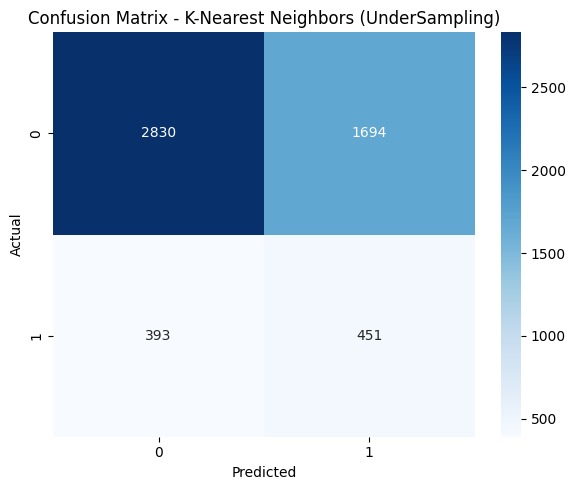


Model: Gradient Boosting | Balancing: SMOTE
Accuracy: 0.8556
F1-Score (class 1): 0.3336

Classification Report:
              precision    recall  f1-score   support

           0     0.8713    0.9724    0.9190      4524
           1     0.6082    0.2299    0.3336       844

    accuracy                         0.8556      5368
   macro avg     0.7397    0.6011    0.6263      5368
weighted avg     0.8299    0.8556    0.8270      5368



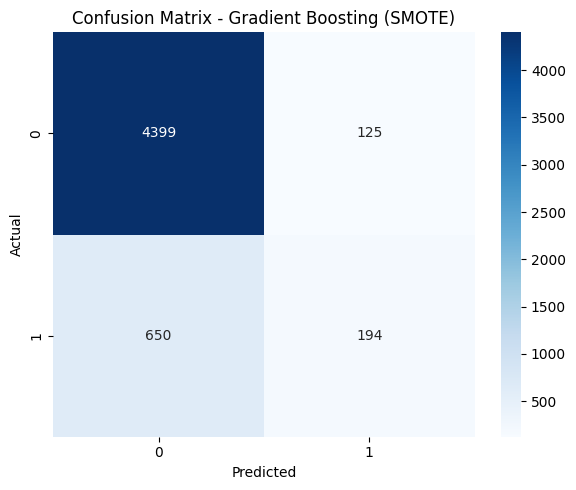


Model: Gradient Boosting | Balancing: UnderSampling
Accuracy: 0.7014
F1-Score (class 1): 0.4016

Classification Report:
              precision    recall  f1-score   support

           0     0.9134    0.7133    0.8010      4524
           1     0.2932    0.6374    0.4016       844

    accuracy                         0.7014      5368
   macro avg     0.6033    0.6754    0.6013      5368
weighted avg     0.8159    0.7014    0.7382      5368



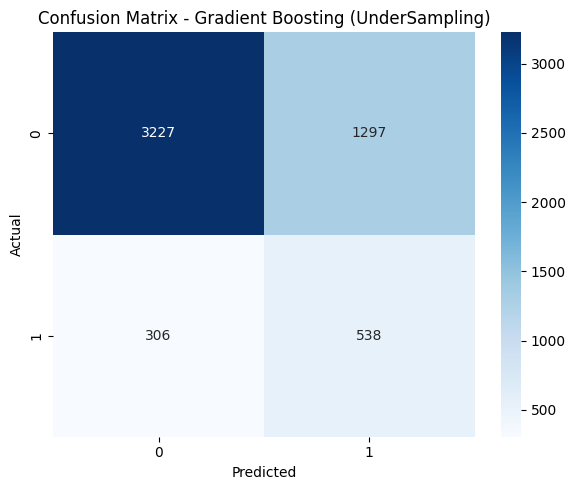


Model: Decision Tree | Balancing: SMOTE
Accuracy: 0.7532
F1-Score (class 1): 0.2740

Classification Report:
              precision    recall  f1-score   support

           0     0.8646    0.8384    0.8513      4524
           1     0.2548    0.2962    0.2740       844

    accuracy                         0.7532      5368
   macro avg     0.5597    0.5673    0.5626      5368
weighted avg     0.7687    0.7532    0.7605      5368



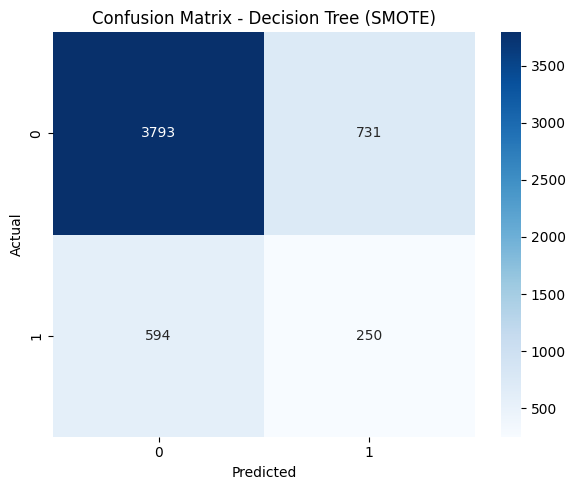


Model: Decision Tree | Balancing: UnderSampling
Accuracy: 0.5933
F1-Score (class 1): 0.3193

Classification Report:
              precision    recall  f1-score   support

           0     0.8895    0.5908    0.7101      4524
           1     0.2167    0.6066    0.3193       844

    accuracy                         0.5933      5368
   macro avg     0.5531    0.5987    0.5147      5368
weighted avg     0.7837    0.5933    0.6486      5368



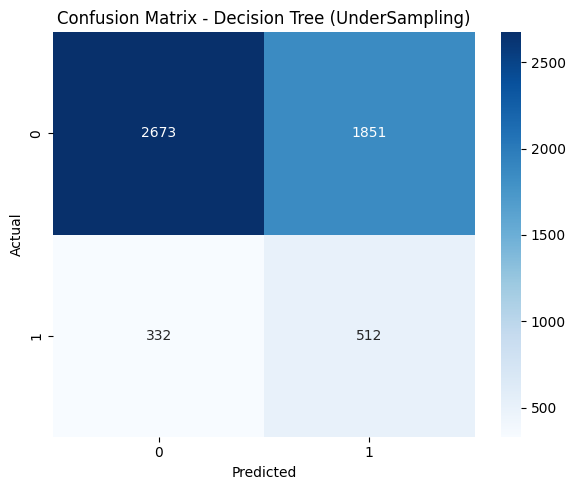


Model: Naive Bayes | Balancing: SMOTE
Accuracy: 0.3841
F1-Score (class 1): 0.3113

Classification Report:
              precision    recall  f1-score   support

           0     0.9313    0.2907    0.4431      4524
           1     0.1888    0.8851    0.3113       844

    accuracy                         0.3841      5368
   macro avg     0.5601    0.5879    0.3772      5368
weighted avg     0.8146    0.3841    0.4223      5368



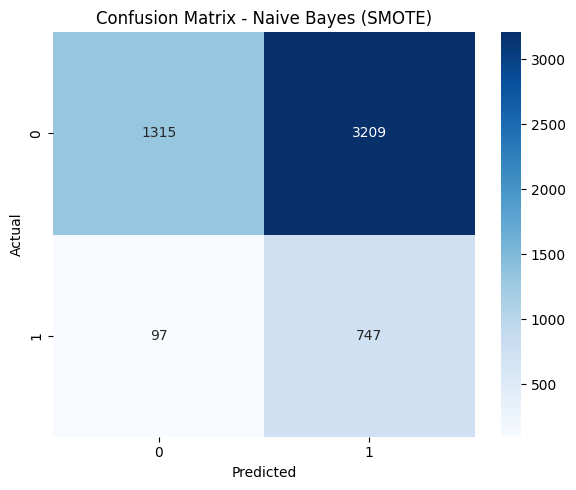


Model: Naive Bayes | Balancing: UnderSampling
Accuracy: 0.8266
F1-Score (class 1): 0.3671

Classification Report:
              precision    recall  f1-score   support

           0     0.8789    0.9211    0.8995      4524
           1     0.4306    0.3199    0.3671       844

    accuracy                         0.8266      5368
   macro avg     0.6548    0.6205    0.6333      5368
weighted avg     0.8084    0.8266    0.8158      5368



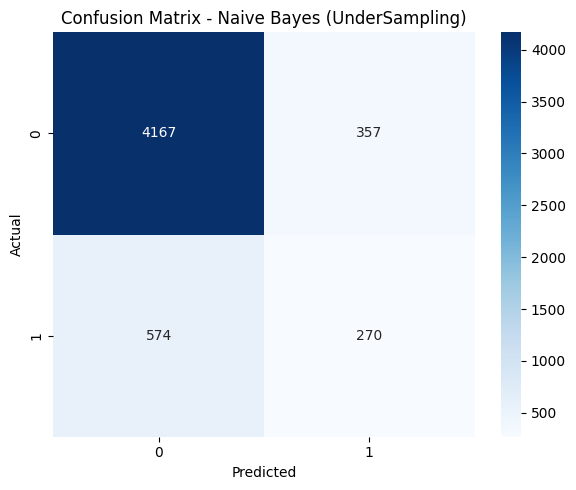


Model: XGBoost | Balancing: SMOTE
Accuracy: 0.8526
F1-Score (class 1): 0.3302

Classification Report:
              precision    recall  f1-score   support

           0     0.8710    0.9686    0.9172      4524
           1     0.5786    0.2310    0.3302       844

    accuracy                         0.8526      5368
   macro avg     0.7248    0.5998    0.6237      5368
weighted avg     0.8250    0.8526    0.8249      5368



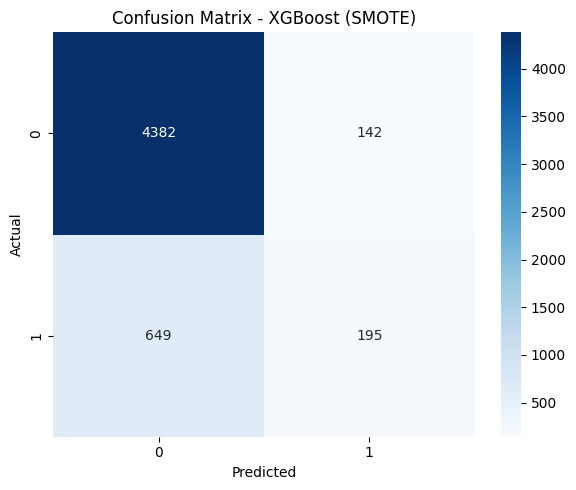


Model: XGBoost | Balancing: UnderSampling
Accuracy: 0.6574
F1-Score (class 1): 0.3674

Classification Report:
              precision    recall  f1-score   support

           0     0.9062    0.6620    0.7651      4524
           1     0.2588    0.6327    0.3674       844

    accuracy                         0.6574      5368
   macro avg     0.5825    0.6474    0.5662      5368
weighted avg     0.8044    0.6574    0.7026      5368



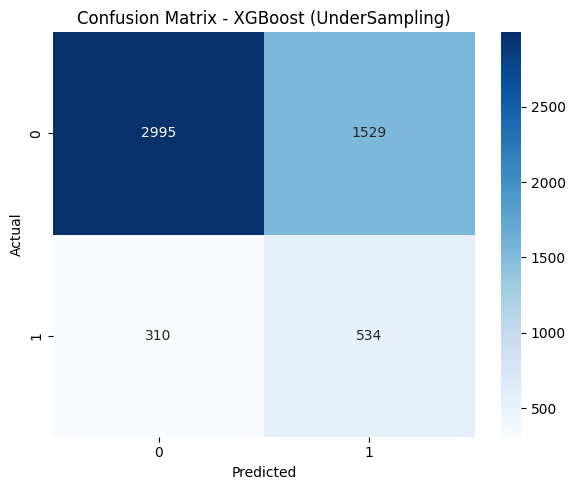


Summary of Results:
                  Model      Balancing  Accuracy  F1-Score
0     Gradient Boosting  UnderSampling  0.701379  0.401642
1   Logistic Regression  UnderSampling  0.698398  0.396571
2   Logistic Regression          SMOTE  0.697466  0.395383
3         Random Forest  UnderSampling  0.690015  0.394909
4               XGBoost  UnderSampling  0.657414  0.367389
5           Naive Bayes  UnderSampling  0.826565  0.367097
6     Gradient Boosting          SMOTE  0.855626  0.333620
7               XGBoost          SMOTE  0.852645  0.330229
8         Decision Tree  UnderSampling  0.593331  0.319302
9           Naive Bayes          SMOTE  0.384128  0.311250
10  K-Nearest Neighbors  UnderSampling  0.611215  0.301773
11        Random Forest          SMOTE  0.855440  0.297101
12  K-Nearest Neighbors          SMOTE  0.562593  0.280196
13        Decision Tree          SMOTE  0.753167  0.273973


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Numeric features for scaling
num_features = [
    'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 
    'credit_limit', 'income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
    'application_time_in_funnel', 'external_data_provider_credit_checks_last_month', 
    'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 
    'external_data_provider_fraud_score', 'reported_income'
]

# Split train/test
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

# Results container
results = []

# Resampling techniques
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "UnderSampling": RandomUnderSampler(random_state=42)
}

# Main loop for models and resampling techniques
for name, model in models.items():
    for method_name, sampler in resamplers.items():
        print(f"\n{'='*60}\nModel: {name} | Balancing: {method_name}")
        
        # Create pipeline
        pipeline = ImbPipeline(steps=[
            ("scaler", ColumnTransformer([
                ("num", StandardScaler(), num_features)
            ], remainder='passthrough')),
            ("sampler", sampler),
            ("classifier", model)
        ])

        # Train the model
        pipeline.fit(X_train_split, y_train_split)
        
        # Predictions
        y_pred = pipeline.predict(X_val)
        
        # Metrics (F1-Score)
        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, pos_label=1)

        # Save results
        results.append({
            "Model": name,
            "Balancing": method_name,
            "Accuracy": acc,
            "F1-Score": f1
        })

        # Print results
        print(f"Accuracy: {acc:.4f}")
        print(f"F1-Score (class 1): {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_val, y_pred, digits=4))
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        
        # Confusion matrix (plot)
        # Plot the confusion matrix using seaborn
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
        plt.title(f"Confusion Matrix - {name} ({method_name})")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()

# Final results
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True))


**Gradient Boosting** (using UnderSampling balancing) proved to be the model with the best F1-Score, it will be used to verify the importance of the feartures. Logistic Regression and Random Forest also stand out.

## Feature Importance

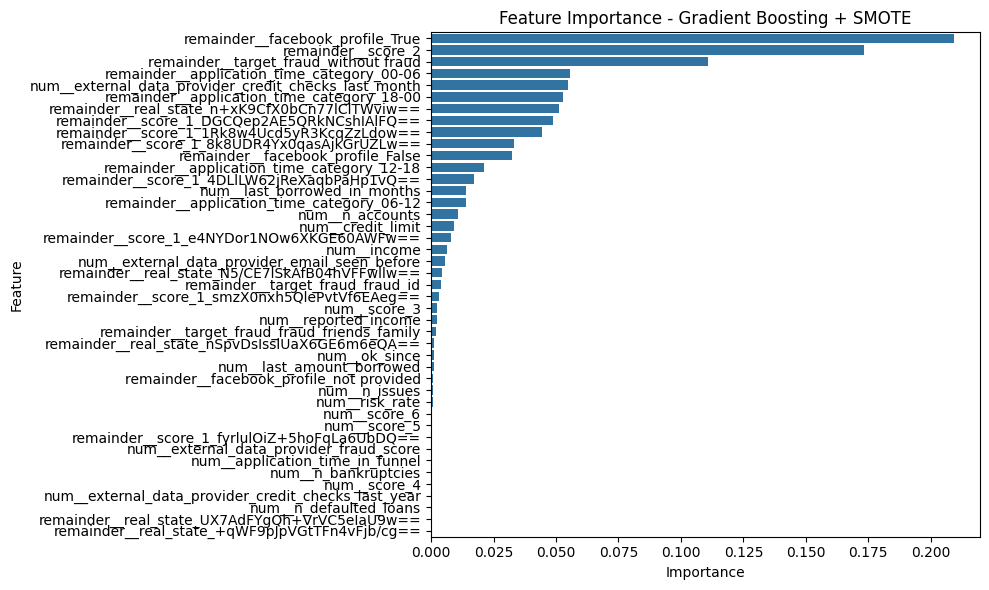

                                              Feature  Importance
29                   remainder__facebook_profile_True    0.209224
20                                 remainder__score_2    0.173342
38              remainder__target_fraud_without fraud    0.110640
39         remainder__application_time_category_00-06    0.055450
15  num__external_data_provider_credit_checks_last...    0.054812
42         remainder__application_time_category_18-00    0.052908
34     remainder__real_state_n+xK9CfX0bCn77lClTWviw==    0.051109
24        remainder__score_1_DGCQep2AE5QRkNCshIAlFQ==    0.048622
21        remainder__score_1_1Rk8w4Ucd5yR3KcqZzLdow==    0.044557
23        remainder__score_1_8k8UDR4Yx0qasAjkGrUZLw==    0.033190
28                  remainder__facebook_profile_False    0.032536
41         remainder__application_time_category_12-18    0.021309
22        remainder__score_1_4DLlLW62jReXaqbPaHp1vQ==    0.017083
6                        num__last_borrowed_in_months    0.014067
40        

In [102]:
# Train/validation split 
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.2, random_state=42
)

# Numeric columns to scale
num_features = [
    'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
    'last_borrowed_in_months', 'credit_limit', 'income', 'ok_since', 'n_bankruptcies',
    'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_in_funnel',
    'external_data_provider_credit_checks_last_month',
    'external_data_provider_credit_checks_last_year',
    'external_data_provider_email_seen_before',
    'external_data_provider_fraud_score', 'reported_income'
]

# Column transformer: scale only numeric columns, pass through the rest
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), num_features)],
    remainder="passthrough"
)

# Full pipeline: preprocessing + SMOTE + classifier
pipeline = ImbPipeline(steps=[
    ("scaler", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(random_state=42))
])

# Train model on the training split (not the full data)
pipeline.fit(X_train_split, y_train_split)

# Extract the trained model
model = pipeline.named_steps["model"]

# Get the feature names after transformation (reliable way)
feature_names = pipeline.named_steps["scaler"].get_feature_names_out()

# Feature importances from the model
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance - Gradient Boosting + SMOTE")
plt.tight_layout()
plt.show()

# Display the importance table
print(feature_importance_df)


In [103]:
# Re-transform X_train and X_test (X_val) using only the preprocessor
X_train_transformed = pipeline.named_steps["scaler"].transform(X_train)
X_test_transformed = pipeline.named_steps["scaler"].transform(X_test)

# Get transformed feature names
feature_names = pipeline.named_steps["scaler"].get_feature_names_out()

# Create DataFrames for easier manipulation
X_train_df = pd.DataFrame(X_train_transformed, columns=feature_names, index=X_train.index)
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)

# Select only important features
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.005]['Feature']
X_train_reduced = X_train_df[important_features]
X_test_reduced = X_test_df[important_features]

In [104]:
X_train_reduced.head()

,remainder__facebook_profile_True,remainder__score_2,remainder__target_fraud_without fraud,remainder__application_time_category_00-06,num__external_data_provider_credit_checks_last_month,remainder__application_time_category_18-00,remainder__real_state_n+xK9CfX0bCn77lClTWviw==,remainder__score_1_DGCQep2AE5QRkNCshIAlFQ==,remainder__score_1_1Rk8w4Ucd5yR3KcqZzLdow==,remainder__score_1_8k8UDR4Yx0qasAjkGrUZLw==,remainder__facebook_profile_False,remainder__application_time_category_12-18,remainder__score_1_4DLlLW62jReXaqbPaHp1vQ==,num__last_borrowed_in_months,remainder__application_time_category_06-12,num__n_accounts,num__credit_limit,remainder__score_1_e4NYDor1NOw6XKGE60AWFw==,num__income,num__external_data_provider_email_seen_before
0,0.0,0.257908,1.0,0.0,0.442199,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.691292,1.0,-1.448477,-0.085048,0.0,-0.543877,0.653003
1,0.0,0.158149,1.0,0.0,0.442199,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.691292,0.0,-0.790750,-0.681691,0.0,-0.398698,-0.136990
2,1.0,0.098999,1.0,1.0,-0.454605,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.691292,0.0,-0.352265,0.370889,0.0,-0.193778,-1.434834
3,0.0,0.033755,1.0,0.0,1.339002,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.100637,0.0,0.305463,0.135412,0.0,-0.429956,1.217283
4,0.0,0.111632,1.0,0.0,-0.454605,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.691292,0.0,-0.790750,-0.681691,0.0,-0.233732,-0.757698


Testing the models again, without the unimportant variables:


Model: Logistic Regression | Resampling: SMOTE
Accuracy: 0.7021
F1-Score (class 1): 0.4018

Classification Report:
              precision    recall  f1-score   support

           0     0.9133    0.7144    0.8017      4524
           1     0.2936    0.6363    0.4018       844

    accuracy                         0.7021      5368
   macro avg     0.6034    0.6753    0.6017      5368
weighted avg     0.8158    0.7021    0.7388      5368



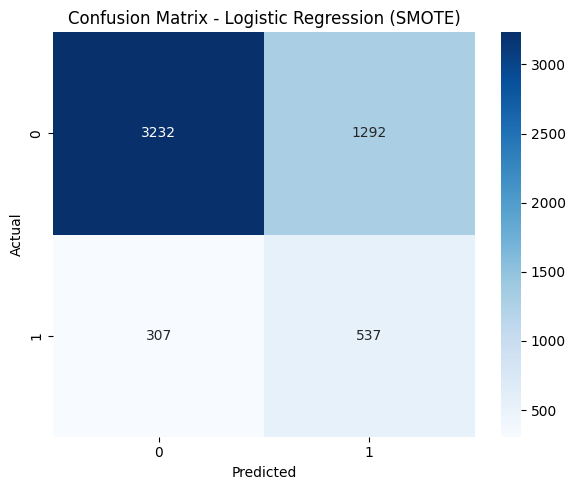


Model: Logistic Regression | Resampling: UnderSampling
Accuracy: 0.7014
F1-Score (class 1): 0.3999

Classification Report:
              precision    recall  f1-score   support

           0     0.9125    0.7142    0.8012      4524
           1     0.2923    0.6327    0.3999       844

    accuracy                         0.7014      5368
   macro avg     0.6024    0.6734    0.6005      5368
weighted avg     0.8149    0.7014    0.7381      5368



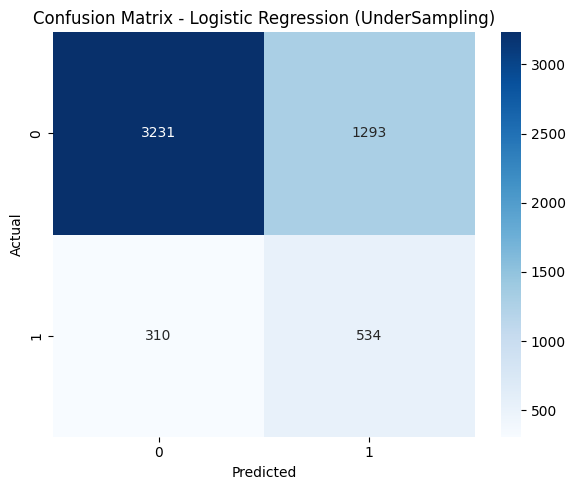


Model: Random Forest | Resampling: SMOTE
Accuracy: 0.8409
F1-Score (class 1): 0.3511

Classification Report:
              precision    recall  f1-score   support

           0     0.8748    0.9467    0.9093      4524
           1     0.4894    0.2737    0.3511       844

    accuracy                         0.8409      5368
   macro avg     0.6821    0.6102    0.6302      5368
weighted avg     0.8142    0.8409    0.8216      5368



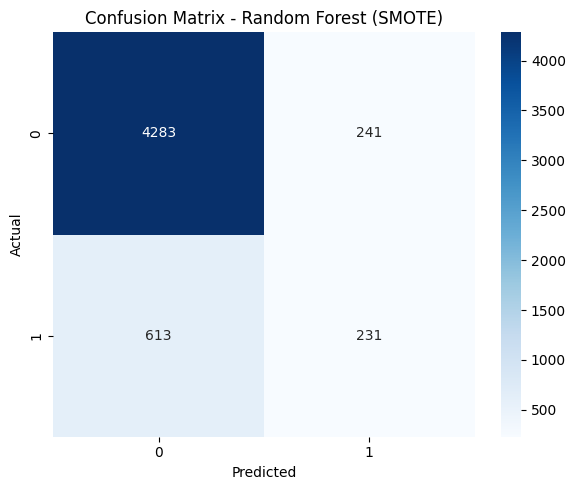


Model: Random Forest | Resampling: UnderSampling
Accuracy: 0.6738
F1-Score (class 1): 0.3802

Classification Report:
              precision    recall  f1-score   support

           0     0.9094    0.6808    0.7787      4524
           1     0.2711    0.6363    0.3802       844

    accuracy                         0.6738      5368
   macro avg     0.5902    0.6585    0.5794      5368
weighted avg     0.8090    0.6738    0.7160      5368



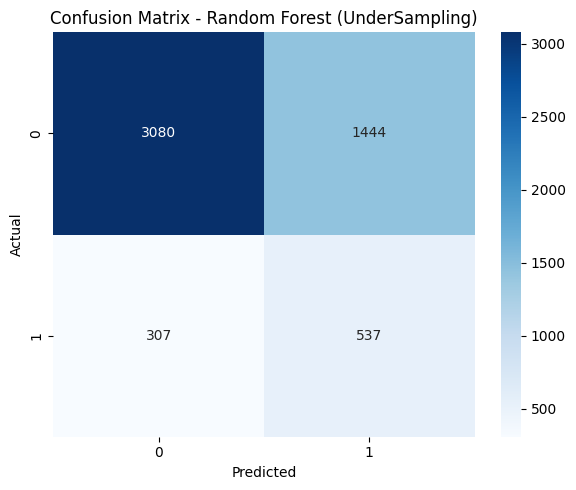


Model: K-Nearest Neighbors | Resampling: SMOTE
Accuracy: 0.6557
F1-Score (class 1): 0.3084

Classification Report:
              precision    recall  f1-score   support

           0     0.8780    0.6870    0.7708      4524
           1     0.2254    0.4882    0.3084       844

    accuracy                         0.6557      5368
   macro avg     0.5517    0.5876    0.5396      5368
weighted avg     0.7754    0.6557    0.6981      5368



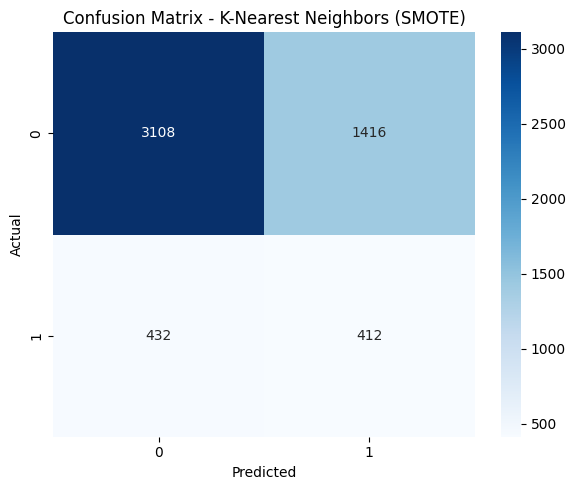


Model: K-Nearest Neighbors | Resampling: UnderSampling
Accuracy: 0.6192
F1-Score (class 1): 0.3146

Classification Report:
              precision    recall  f1-score   support

           0     0.8839    0.6311    0.7364      4524
           1     0.2194    0.5557    0.3146       844

    accuracy                         0.6192      5368
   macro avg     0.5516    0.5934    0.5255      5368
weighted avg     0.7794    0.6192    0.6701      5368



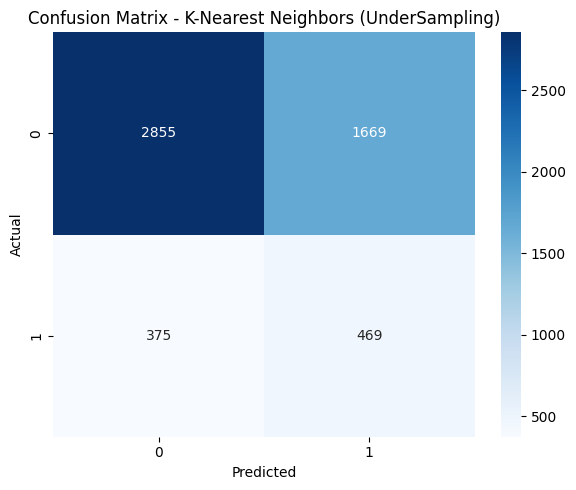


Model: Gradient Boosting | Resampling: SMOTE
Accuracy: 0.8264
F1-Score (class 1): 0.4056

Classification Report:
              precision    recall  f1-score   support

           0     0.8867    0.9103    0.8983      4524
           1     0.4392    0.3768    0.4056       844

    accuracy                         0.8264      5368
   macro avg     0.6630    0.6435    0.6520      5368
weighted avg     0.8164    0.8264    0.8209      5368



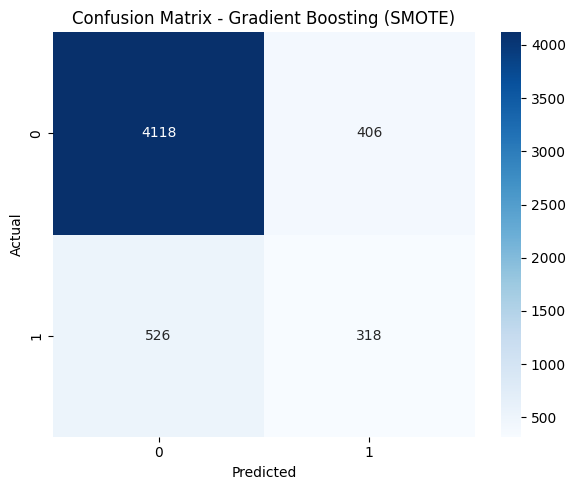


Model: Gradient Boosting | Resampling: UnderSampling
Accuracy: 0.7010
F1-Score (class 1): 0.4031

Classification Report:
              precision    recall  f1-score   support

           0     0.9143    0.7120    0.8005      4524
           1     0.2938    0.6422    0.4031       844

    accuracy                         0.7010      5368
   macro avg     0.6040    0.6771    0.6018      5368
weighted avg     0.8167    0.7010    0.7381      5368



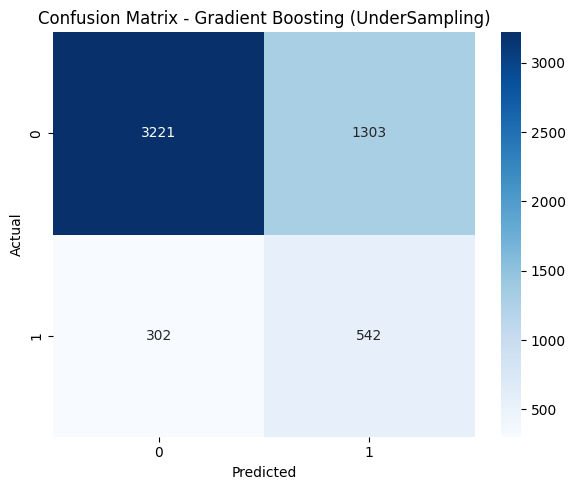


Model: Decision Tree | Resampling: SMOTE
Accuracy: 0.7491
F1-Score (class 1): 0.3032

Classification Report:
              precision    recall  f1-score   support

           0     0.8712    0.8240    0.8470      4524
           1     0.2691    0.3472    0.3032       844

    accuracy                         0.7491      5368
   macro avg     0.5701    0.5856    0.5751      5368
weighted avg     0.7766    0.7491    0.7615      5368



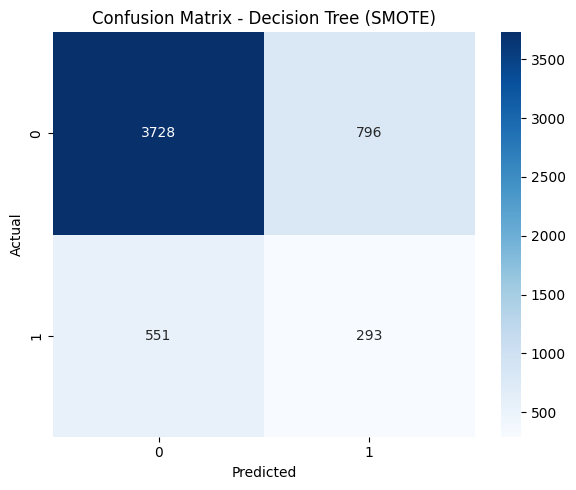


Model: Decision Tree | Resampling: UnderSampling
Accuracy: 0.5844
F1-Score (class 1): 0.3159

Classification Report:
              precision    recall  f1-score   support

           0     0.8885    0.5796    0.7015      4524
           1     0.2131    0.6102    0.3159       844

    accuracy                         0.5844      5368
   macro avg     0.5508    0.5949    0.5087      5368
weighted avg     0.7823    0.5844    0.6409      5368



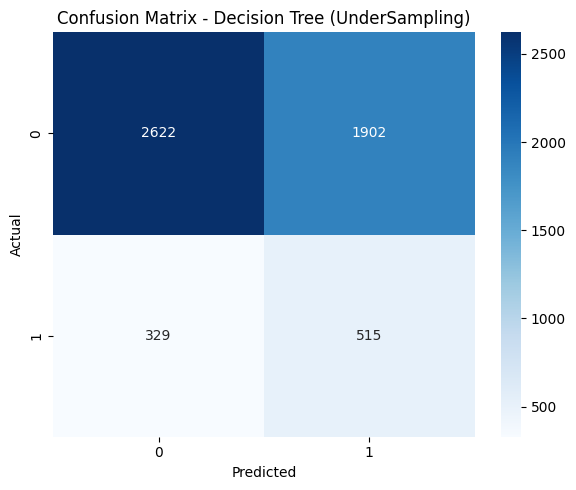


Model: Naive Bayes | Resampling: SMOTE
Accuracy: 0.7224
F1-Score (class 1): 0.4045

Classification Report:
              precision    recall  f1-score   support

           0     0.9089    0.7454    0.8190      4524
           1     0.3052    0.5995    0.4045       844

    accuracy                         0.7224      5368
   macro avg     0.6070    0.6724    0.6118      5368
weighted avg     0.8140    0.7224    0.7539      5368



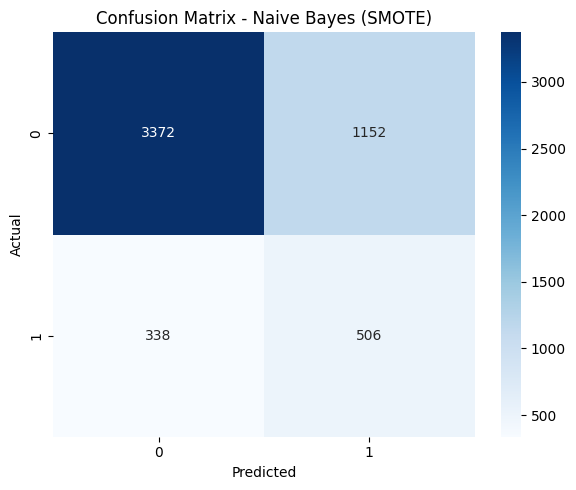


Model: Naive Bayes | Resampling: UnderSampling
Accuracy: 0.7701
F1-Score (class 1): 0.4044

Classification Report:
              precision    recall  f1-score   support

           0     0.8973    0.8212    0.8576      4524
           1     0.3412    0.4964    0.4044       844

    accuracy                         0.7701      5368
   macro avg     0.6193    0.6588    0.6310      5368
weighted avg     0.8099    0.7701    0.7863      5368



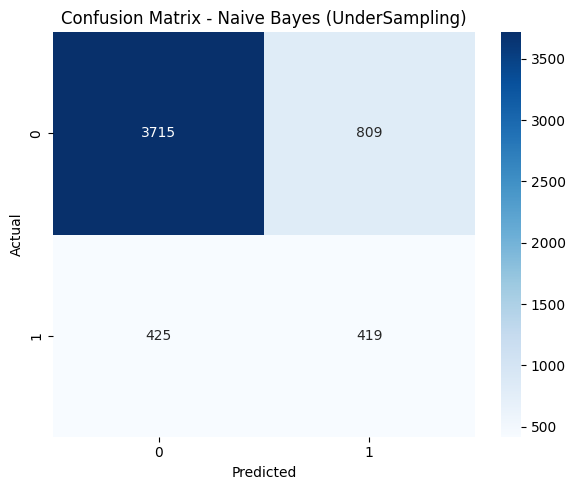


Model: XGBoost | Resampling: SMOTE
Accuracy: 0.8441
F1-Score (class 1): 0.2889

Classification Report:
              precision    recall  f1-score   support

           0     0.8661    0.9640    0.9124      4524
           1     0.5105    0.2014    0.2889       844

    accuracy                         0.8441      5368
   macro avg     0.6883    0.5827    0.6007      5368
weighted avg     0.8102    0.8441    0.8144      5368



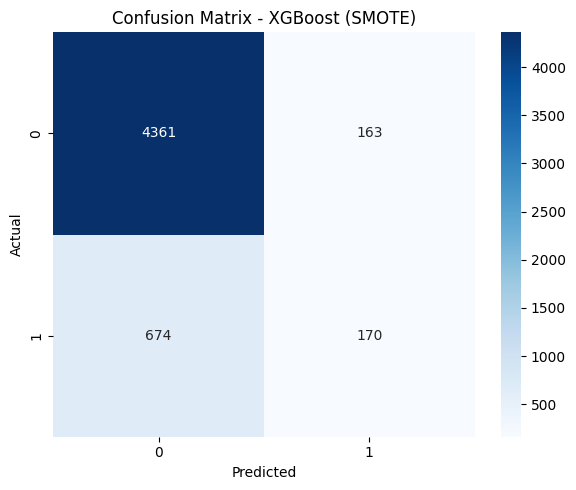


Model: XGBoost | Resampling: UnderSampling
Accuracy: 0.6606
F1-Score (class 1): 0.3722

Classification Report:
              precision    recall  f1-score   support

           0     0.9082    0.6645    0.7674      4524
           1     0.2624    0.6398    0.3722       844

    accuracy                         0.6606      5368
   macro avg     0.5853    0.6521    0.5698      5368
weighted avg     0.8066    0.6606    0.7053      5368



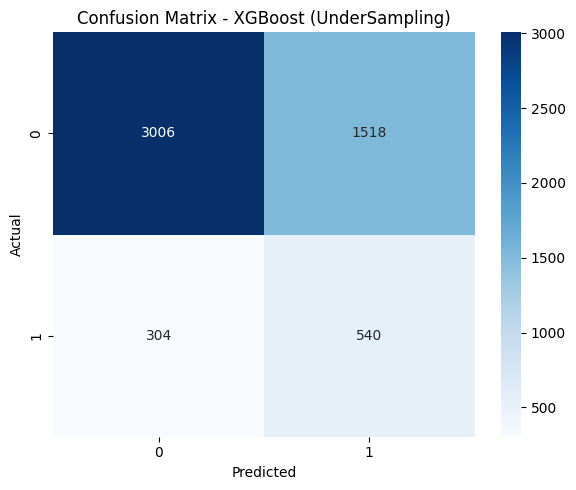


Results Summary:
                  Model     Resampling  Accuracy  F1-Score
0     Gradient Boosting          SMOTE  0.826379  0.405612
1           Naive Bayes          SMOTE  0.722429  0.404476
2           Naive Bayes  UnderSampling  0.770119  0.404440
3     Gradient Boosting  UnderSampling  0.701006  0.403124
4   Logistic Regression          SMOTE  0.702124  0.401796
5   Logistic Regression  UnderSampling  0.701379  0.399850
6         Random Forest  UnderSampling  0.673808  0.380177
7               XGBoost  UnderSampling  0.660581  0.372157
8         Random Forest          SMOTE  0.840909  0.351064
9         Decision Tree  UnderSampling  0.584389  0.315854
10  K-Nearest Neighbors  UnderSampling  0.619225  0.314554
11  K-Nearest Neighbors          SMOTE  0.655738  0.308383
12        Decision Tree          SMOTE  0.749069  0.303156
13              XGBoost          SMOTE  0.844076  0.288870


In [105]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Numerical features for scaling
num_features = [
    'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
    'last_borrowed_in_months', 'credit_limit', 'income', 'ok_since', 'n_bankruptcies',
    'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_in_funnel',
    'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year',
    'external_data_provider_email_seen_before', 'external_data_provider_fraud_score', 'reported_income'
]

# Ensure only existing features are used
num_features = [col for col in num_features if col in X_train_reduced.columns]

# Train-validation split
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_reduced, y_train, stratify=y_train, test_size=0.2, random_state=42
)

# Store evaluation results
results = []

# Define resampling techniques
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "UnderSampling": RandomUnderSampler(random_state=42)
}

# Main loop through models and resampling strategies
for model_name, model in models.items():
    for resample_name, sampler in resamplers.items():
        print(f"\n{'='*60}\nModel: {model_name} | Resampling: {resample_name}")
        
        # Build pipeline
        pipeline = ImbPipeline(steps=[
            ("scaler", ColumnTransformer([
                ("num", StandardScaler(), num_features)
            ], remainder='passthrough')),
            ("sampler", sampler),
            ("classifier", model)
        ])

        # Train model
        pipeline.fit(X_train_split, y_train_split)
        
        # Make predictions
        y_pred = pipeline.predict(X_val)

        # Calculate metrics
        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, pos_label=1)

        # Save results
        results.append({
            "Model": model_name,
            "Resampling": resample_name,
            "Accuracy": acc,
            "F1-Score": f1
        })

        # Display results
        print(f"Accuracy: {acc:.4f}")
        print(f"F1-Score (class 1): {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_val, y_pred, digits=4))
        
        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
        plt.title(f"Confusion Matrix - {model_name} ({resample_name})")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()

# Summary of all results
results_df = pd.DataFrame(results)
print("\nResults Summary:")
print(results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True))


The metric did not increase much, but more models reached the F1-Score > 0.4 level. From now on we will use 3 models for the following phases: 
- Gradient Boosting
- Naive Bayes
- Logistic Regression

We will only use the SMOTE technique for data balancing.

## Hyperparameters Tuning

Hyperparameter tuning is **select the best combination of hyperparameters** (e.g., number of estimators, learning rate, or tree depth) that allow the model to generalize well to unseen data, **maximizing its predictive accuracy while minimizing overfitting**.


To this **RandomizedSearchCV will be used**. It randomly samples from the specified hyperparameter space for a given number of iterations and evaluates each combination using cross-validation. RandomizedSearch helps to identify the best performing hyperparameters for the model, balancing accuracy and computational efficiency.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from scipy.stats import uniform, randint

# Ensure target is 1D
y_train_split = y_train_split.values.ravel() if hasattr(y_train_split, "values") else y_train_split.ravel()

# Preprocessing: scaling numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features)
    ],
    remainder="passthrough"
)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Models and corresponding hyperparameter search spaces
models_and_params = {
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "classifier__n_estimators": randint(100, 300),
            "classifier__learning_rate": uniform(0.01, 0.3),
            "classifier__max_depth": randint(3, 10),
            "classifier__subsample": uniform(0.7, 0.3),
            "classifier__min_samples_split": randint(2, 10)
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "classifier__C": uniform(0.01, 10),
            "classifier__penalty": ["l2"],
            "classifier__solver": ["lbfgs"]
        }
    },
    "NaiveBayes": {
        "model": GaussianNB(),
        "params": {
            "classifier__var_smoothing": uniform(1e-10, 1e-8)
        }
    }
}

# Run tuning for each model
for model_name, config in models_and_params.items():
    print(f"\n{'='*60}\nTuning model: {model_name}")
    
    # Define pipeline with preprocessing, SMOTE and model
    pipeline = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("sampler", SMOTE(random_state=42)),
        ("classifier", config["model"])
    ])
    
    # Define RandomizedSearchCV with F1-score as scoring metric
    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=config["params"],
        n_iter=30,
        scoring='f1',
        cv=cv,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )
    
    # Fit model
    search.fit(X_train_split, y_train_split)
    
    # Show best parameters and F1-score
    print("\nBest parameters found:")
    print(search.best_params_)
    
    print("\nBest F1-score:")
    print(search.best_score_)



Tuning model: GradientBoosting
Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END classifier__learning_rate=0.1890550473839461, classifier__max_depth=4, classifier__min_samples_split=4, classifier__n_estimators=174, classifier__subsample=0.8377746675897602; total time=  38.9s
[CV] END classifier__learning_rate=0.1890550473839461, classifier__max_depth=4, classifier__min_samples_split=4, classifier__n_estimators=174, classifier__subsample=0.8377746675897602; total time=  48.5s
[CV] END classifier__learning_rate=0.12236203565420874, classifier__max_depth=7, classifier__min_samples_split=8, classifier__n_estimators=206, classifier__subsample=0.9339073000818308; total time= 1.7min
[CV] END classifier__learning_rate=0.12236203565420874, classifier__max_depth=7, classifier__min_samples_split=8, classifier__n_estimators=206, classifier__subsample=0.9339073000818308; total time= 1.7min
[CV] END classifier__learning_rate=0.12236203565420874, classifier__max_depth=7, classifi

The metrics did not increase, however Cross-Validation was used here, that is, each model was tested with different sets of data, which implies greater accuracy of this metric.

## Training with all Training Data

Training the Gradient Boosting model, with the selected hyperparameters and using all the data from the test set

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

# Ensure target is 1D
y_train_final = y_train.values.ravel() if hasattr(y_train, "values") else y_train.ravel()

# Standardization for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features)  # Using StandardScaler for standardization
    ],
    remainder="passthrough"
)

# Gradient Boosting: best hyperparameters
best_gb_params = {
    'learning_rate': 0.05958008171890075,
    'max_depth': 3,
    'min_samples_split': 8,
    'n_estimators': 108,
    'subsample': 0.9316734307889971
}

# Final pipeline - Gradient Boosting
final_gb_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("sampler", SMOTE(random_state=42)),  # Using SMOTE for balancing the dataset
    ("classifier", GradientBoostingClassifier(random_state=42, **best_gb_params))  # Gradient Boosting with best hyperparameters
])

# Fit the model
final_gb_pipeline.fit(X_train_reduced, y_train_final)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  [])])),
                ('sampler', SMOTE(random_state=42)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05958008171890075,
                                            min_samples_split=8,
                                            n_estimators=108, random_state=42,
                                            subsample=0.9316734307889971))])

### Testing the model

At this stage, a better metric is expected, as the model is being tested with the same data it was trained on.

Classification Report:
              precision    recall  f1-score   support

           0     0.8952    0.8637    0.8792     22615
           1     0.3858    0.4586    0.4190      4222

    accuracy                         0.8000     26837
   macro avg     0.6405    0.6611    0.6491     26837
weighted avg     0.8151    0.8000    0.8068     26837

Train Accuracy: 0.8000
Train F1-Score: 0.4190


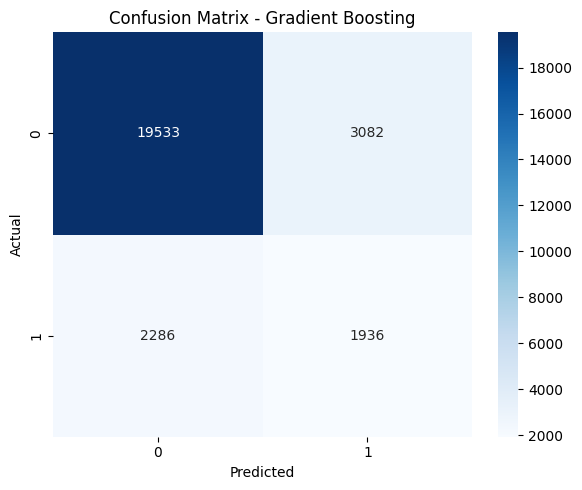

In [107]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the training set
y_train_pred = final_gb_pipeline.predict(X_train_reduced)

# Evaluate the model
train_accuracy = accuracy_score(y_train_final, y_train_pred)
train_f1_score = f1_score(y_train_final, y_train_pred, pos_label=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_train_final, y_train_pred, digits=4))

# Print accuracy and F1 score
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train F1-Score: {train_f1_score:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_train_final, y_train_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


F1-Score = 0.4190, slightly higher

## Saving the Model


In [108]:
import joblib
# Saving the model
joblib.dump(final_gb_pipeline, 'credit_risk_model.pkl')

print("Model saved successfully!")

Model saved successfully!


# Evaluation

Classification Report (Test Set):
              precision    recall  f1-score   support

           0     0.8901    0.8590    0.8742      9643
           1     0.3807    0.4497    0.4123      1859

    accuracy                         0.7928     11502
   macro avg     0.6354    0.6543    0.6433     11502
weighted avg     0.8077    0.7928    0.7996     11502



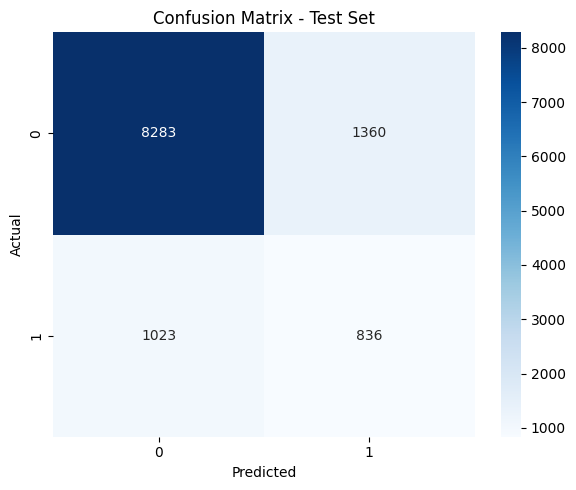

In [ ]:
# Loading the model
model = joblib.load('../credit_risk_model.pkl')

# Make predictions on the est set
y_pred = model.predict(X_test_reduced) 

# Show evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### Conclusion 

The credit risk assessment model, after training and evaluation, demonstrates a promising level of performance, with an overall accuracy of 79.28%. However, as the results suggest, there is a noticeable imbalance between the two classes (0 and 1). The model **performs significantly better in predicting class 0 (non-defaulting customers)**, with a precision of 0.8901 and a recall of 0.8590, resulting in an F1 of 0.8742. This indicates that the model is highly accurate in identifying non-defaulting customers, which is critical in financial risk management.

On the other hand, **for class 1 (non-defaulting customers), the model presents lower precision (0.3807) and recall (0.4497), with an F1 of 0.4123**. While this suggests that **the model struggles to accurately identify delinquent customers**, it is important to note that recall is slightly higher than precision, indicating that the model tends to identify more true delinquencies, but with a higher rate of false positives.

The macro average F1 score of 0.6433 and the weighted average F1 score of 0.7996 reflect the overall performance of the model, with a clear emphasis on the better prediction of class 0, but also acknowledging the challenges faced in predicting the minority class.

*Key Insights:*

*   Imbalanced Classes: The significant difference in performance between the two classes suggests that the model is likely influenced by class imbalance in the dataset. The Synthetic Minority Over-sampling Technique (SMOTE) was used to balance the classes, but additional adjustments may be needed, such as different sampling strategies or model adjustments for imbalanced data.

*   Precision vs. Recall: The higher recall for class 1 (defaulting customers) is promising, but the lower precision indicates the need for optimization to reduce false positives, especially in credit risk models where the cost of incorrectly predicting a defaulting customer can be significant.

*   In summary, the model shows promise for practical use, especially in identifying compliant customers, but further improvements are needed to improve its ability to detect defaults more accurately.

# Deployment
**LOADING**...